In [33]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## flip coin model

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H', 'T'], size=N)

throws=throw_a_coin(40)
print("Throws:", " ".join(throws))
print("Number of Heads: ", np.sum(throws=="H"))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40)

Throws: T H H H H T H T T T H T T T T H H T H H H H H H H T H T T H H T T T H T T H H T
Number of Heads:  21
p1 = Number of Heads/Total Throws: 0.525


In [3]:
throws=throw_a_coin(40)
print(type(throws))
print("Throws:", " ".join(throws))
print("Number of Heads: ", np.sum(throws=="H"))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40)

<class 'numpy.ndarray'>
Throws: T H T H H H H H H H H T T H H H T T T T T T H H H H H T T T T T H H T H H T H T
Number of Heads:  22
p1 = Number of Heads/Total Throws: 0.55


In [4]:
throws=throw_a_coin(10000)
print(type(throws))
print("First 1000 Throws:", " ".join(throws)[:1000])
print("Number of Heads: ", np.sum(throws=="H"))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000)

<class 'numpy.ndarray'>
First 1000 Throws: T T H T T H T T H T T H T H H H H T T T T H T T H T H T H H H T H T T T T H T T T T T T H H T H H H T T H H H T T T H H T H T T H T H H H T H H H T H H H T T T H H T H T H T T H T T T H T T H T H T H T H H H T T H H T T T T T H H H H H T H H H T H T T T T H T T T T T H T H H H H H T H H T T T H H H T H T H H T T T T T H H T H T T T T H H H H H H H H T T H H H T T H H H H T H H T T H H T T H H T H H H T H T T T T T H T T H T H T H T H H H T T T H T T T H T H T H H T T H T T H T H H H T H H H T T T T H T T H T T T H T T T H T H T T H H H T H T H H H H H H H T H T T H H H T T T T T H T T H H H T T H T H T T H H T T H H H T T T H T T H H T T T T H T T H H T H H H T T H H H H H T T H H T T T T T H H T T H H H H H H H H H H T T T H H H H H T T H H H H H H H H T T H T H H H T H T T T H T T T T T T T H H T H H H H T T H T T T T T H T H T H H T T H H H H T H H T T T T T H T H T H T H T H H H H H H H H H H T T H H T H H H H H T H T T T H T T H H H T T T

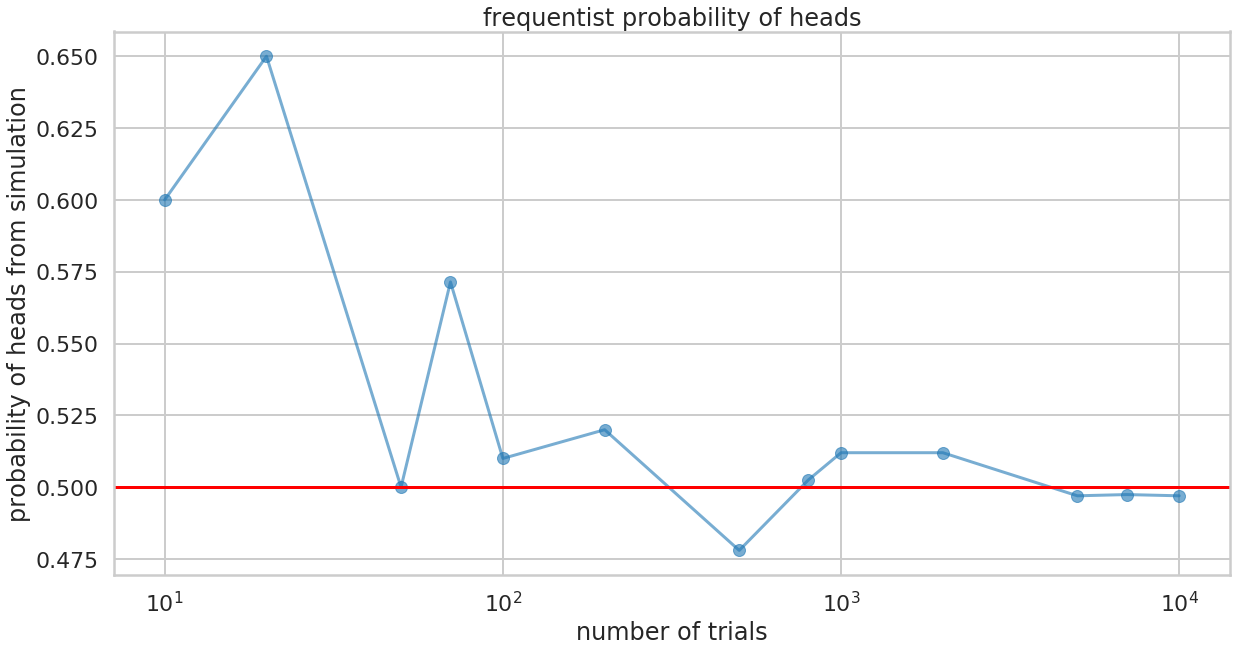

In [35]:
trials = [10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log");
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

## election model

In [6]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [7]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    return obama_votes.sum(axis=0)

In [18]:
result = simulate_election(predictwise, 10000)
print(result.shape)
print((result >= 269).sum())

(10000,)
9952


In [19]:
print(result.size)
result

10000


array([347, 322, 344, ..., 311, 331, 308])

In [22]:
def plot_simulation(simulation):
    plt.hist(simulation, bins=np.arange(200, 538, 1),
             label='simulations', align='left', density=True)
    plt.axvline(332, 0, .5, color='r', label='Actual outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

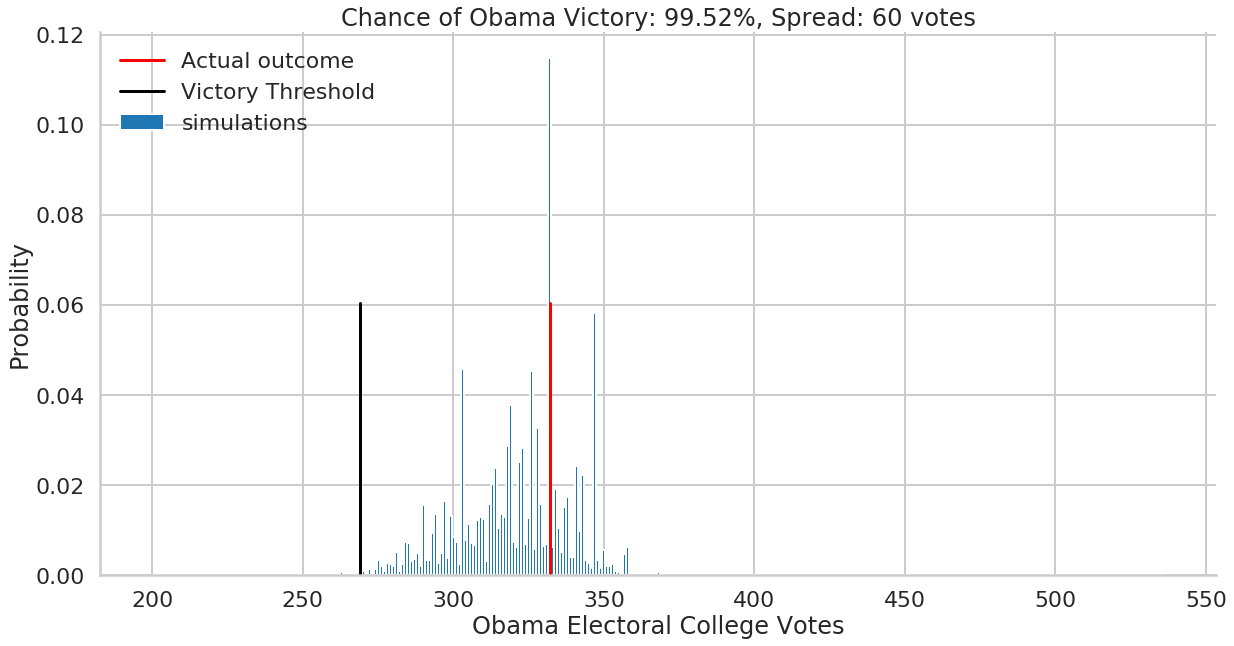

In [36]:
plot_simulation(result)